In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:

import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
import csv

from os import listdir
from os.path import isfile, join

In [25]:
train_data_list = []
with open('drive/My Drive/korat_sauce/img_csv.csv') as f_img:
    img_bins = csv.reader(f_img)
    for im in img_bins:
        train_data_list.append(im)
    f_img.close()

# r_bins =  np.array(train_data_list[0][1:33]).astype(np.float)
# g_bins = np.array(train_data_list[0][33:65]).astype(np.float)
# b_bins = np.array(train_data_list[0][65:97]).astype(np.float)




In [26]:
r_bins = []
g_bins = []
b_bins = []
target = []
data_for_train = []
for i in range(len(train_data_list)):
    img_data = np.array(train_data_list[i]).astype(np.float)
    # min_x =  min(img_data) 
    # max_x = max(img_data)
    # for j in range(1,len(img_data)):
    #     img_data[j] = (img_data[j]-min_x)/(max_x-min_x) #normalization
    data_for_train.append(img_data)
    r_bins.append(img_data[1:33])
    g_bins.append(img_data[33:65])
    b_bins.append(img_data[65:97])
    target.append(img_data[0])


bins_order = np.arange(32).astype(np.float)
for i in range(len(bins_order)):
    bins_order[i]  = (bins_order[i]-1)/31

322.0


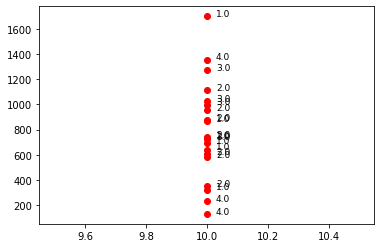

[1.0, 1.0, 4.0, 2.0, 1.0, 4.0, 1.0, 4.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0]


In [27]:
print(r_bins[0][19])
for i in range(20):
    plt.plot(10,r_bins[i][19],'or')
    plt.text(10+.03, r_bins[i][19]+.03, target[i], fontsize=9)
plt.show()
print(target[:20])


In [ ]:
# weight_for_separate_bins = []
# for i in range(32):
#     weight_for_separate_bins.append(np.random.rand(6)+np.array([0.01,0.01,0.01,0.1,0.1,0.1]))


weight_for_separate_bins = []
for i in range(32):
    weight_for_separate_bins.append([np.random.rand(2)+np.array([0.1,0.1]) #เส้นบน
    ,np.random.rand(2)+np.array([0.1,0.1]) #เส้นกลาง
    ,np.random.rand(2)+np.array([0.1,0.1]) ]) #เส้นล่าง
weight_for_separate_bins

In [29]:
weight_for_sum_weight_separate_bin = []
for i in range(32):
    weight_for_sum_weight_separate_bin.append([np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 1
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 2
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 3
    ,np.random.rand(3)+np.array([0.1,0.1,0.1]) #โหนด 4
     ]) 
    

In [ ]:
weight_for_sum_weight_separate_bin

In [31]:
weight_for_identify_color_chanel = []
for i in range(128*4):
    weight_for_identify_color_chanel.append(np.random.rand()+0.01)

In [32]:
weight_for_identify_type = []
for i in range(4*4):
    weight_for_identify_type.append(np.random.rand()+0.01)

In [33]:
bias_for_separate_bins = np.ones(32).astype(np.float)
bias_for_sum_weight_of_separate_bins = np.ones(32).astype(np.float)
bias_for_identify_color_chanel = np.ones(128).astype(np.float)
bias_for_identify_type = np.ones(4).astype(np.float)

In [34]:
def perceptron_for_separate_bins(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return np.dot(input_data,np.transpose(weight))+bias

In [35]:
def transfer_function_for_separate_bins_line1(result_of_summation): # เส้นที่ 1
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.8):
        return 1
    else:
        return 0

In [36]:
def train_weight_for_seperate_bins_line1(input_data,weight,bias,target,result):
    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [37]:
def transfer_function_for_separate_bins_line2(result_of_summation):# เส้นที่ 2
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.5):
        return 1
    else:
        return 0

In [38]:
def train_weight_for_seperate_bins_line2(input_data,weight,bias,target,result): 
    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [39]:
def transfer_function_for_separate_bins_line3(result_of_summation): # เส้นที่ 3
    print("result_of_summation = ",result_of_summation)
    if(result_of_summation>=0.3):
        return 1
    else:
        return 0

In [40]:
def train_function_for_separate_bins_line3(result_of_summation):

    while(result != target):
        error = target-result
        weight = weight+np.dot(error,input_data)*0.1
        bias = bias+error*0.1
        result = transfer_function_for_separate_bins_line1(np.dot(weight,np.transpose(input_data))+bias)
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    return weight,bias,result

In [55]:
def transfer_function_for_sum_weight_separate_bin(result_of_summation): #รับค่า จาก การแยกเส้นใน bin
    # print("result_of_summation = ",result_of_summation)
    for i in range(len(result_of_summation)):
        if(result_of_summation[i]>=2):#?1
            result_of_summation[i] = 1
        else:
            result_of_summation[i] = 0
    return result_of_summation

In [96]:
def train_function_for_sum_weight_separate_bin(input_data,weight,bias,target,result,weight_position,bias_position,bins_order,weight_for_bins,weight_bins_postion,bias_for_bins,bias_bins_position):
    target_array = 0
    if(target == 1):
          target_array = np.array([1,0,0,0])
    elif(target == 2):
          target_array = np.array([0,1,0,0])
    elif(target == 3):
          target_array = np.array([0,0,1,0])
    elif(target == 4):
          target_array = np.array([0,0,0,1])
    while not (np.array_equal(result,target_array) ):
        error = target-result
        for i in range(len(weight[weight_position])):
            delta_weight = np.dot(error,weight[weight_position])/sum(weight[weight_position][i])*0.1
            print(delta_weight)
            weight[weight_position][i] = weight[weight_position][i]+ delta_weight
        bias[bias_position] = bias[bias_position]+sum(error)*0.1
        
        #ต้องแก้กลับไปที่ต้นตอต่อ
        # weight_for_bins[weight_bins_postion]


        result_from_line1 = transfer_function_for_separate_bins_line1(perceptron_for_separate_bins(np.array([bins_order,input_data]),weight_for_bins[weight_bins_postion][0],bias_for_bins[bias_bins_position]))
        result_from_line2 = transfer_function_for_separate_bins_line2(perceptron_for_separate_bins(np.array([bins_order,input_data]),weight_for_bins[weight_bins_postion][1],bias_for_bins[bias_bins_position]))
        result_from_line3 = transfer_function_for_separate_bins_line3(perceptron_for_separate_bins(np.array([bins_order,input_data]),weight_for_bins[weight_bins_postion][2],bias_for_bins[bias_bins_position]))
        
        result = transfer_function_for_sum_weight_separate_bin(perceptron_for_separate_bins(np.array([result_from_line1,result_from_line2,result_from_line3]),weight[weight_position],bias[bias_position]))
        print("in train mode : error = ",error,"weight = ",weight," bias = ",bias," result = ",result)
    # return weight,bias,result

In [43]:
def perceptron_identify_color_chanel(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return transfer_function_identify_color_chanel(np.dot(weight,np.transpose(input_data))+bias)

In [44]:
def transfer_function_identify_color_chanel(result_of_summation):
    pass

In [45]:
def train_weight_for_identify_color_chanel(input_data,weight,bias,target,result):
    pass

In [46]:
def perceptron_identify_type(input_data,weight,bias):
    #print(np.dot(weight,np.transpose(input_data))+bias)
    return transfer_function_identify_type(np.dot(weight,np.transpose(input_data))+bias)

In [48]:
def transfer_function_identify_type(result_of_summation):
    pass

In [49]:
def train_weight_for_identify_type(input_data,weight,bias,target,result):
    pass

In [99]:
#test for r_bin
def train_until_weight_suit_for_classify(input_data,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias_for_separate_bins,bias_for_sum_weight_of_separate_bins,target):
    round_for_train = 0
    check_true = 0

    while (check_true <32 and round_for_train<200):
        round_for_train+=1
        check_true = 0

        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นสูง
        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นกลาง
        #นำ แต่ละ ช่วงbins กับความสูงของbins (เป็น x y) เข้าสู่ โหนดเส้นต่ำ
        #นำ ค่า ที่ออกมาจากทั้ง 3 เส้น เข้า 4 โหนดเพื่อแยกชนิด(4 โหนดนี้เป็นตัวเฉลย)
        #เช็ค ผลลัพธ์ จากนั้นทำการ ฝึกกลับ(เมื่อผลลัพธ์ผิด) โดยเริ่มฝึกที่ส่วนของ ฟังก์ชัน 4 โหนด
        #ปรับ weight ของทาง จากเส้น สูง กลาง ต่ำ ต่อ

        #######
        #จัดการทีละจุด
        for i in range(len(input_data)):
            for j in range(len(input_data[0])):
                result_from_line1 = transfer_function_for_separate_bins_line1(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][0],bias_for_separate_bins[i]))
                result_from_line2 = transfer_function_for_separate_bins_line2(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][1],bias_for_separate_bins[i]))
                result_from_line3 = transfer_function_for_separate_bins_line3(perceptron_for_separate_bins(np.array([bins_order[j],input_data[i][j]]),weight_for_separate_bins[i][2],bias_for_separate_bins[i]))
                
                result_from_sum_weight = transfer_function_for_sum_weight_separate_bin(perceptron_for_separate_bins(np.array([result_from_line1,result_from_line2,result_from_line3]),weight_for_sum_weight_separate_bin[j],bias_for_sum_weight_of_separate_bins[j]))
                print(result_from_sum_weight)
                train_function_for_sum_weight_separate_bin(input_data[i][j],weight_for_sum_weight_separate_bin,bias_for_sum_weight_of_separate_bins,target[i],result_from_sum_weight,j,j,bins_order[j],weight_for_separate_bins,i,bias_for_separate_bins,i)
                print("**************")
                break
                #ต่อไปปรับ weight
                #ใช้ target (4 ชนิด)เช็ค จากนั้น ปรับ weight ของช่วง 3 ถึง 4
                #จากนั้นก็ปรับ weight ของช่วง input เข้ามาแบ่ง 3 เส้น
                
            break
        break

    print("Now,Weight are OK! and use round for train = ",round_for_train)
    #return weight,bias

In [100]:
# weight,bias = train_until_weight_suit_for_classify(input_data,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias,target)
out = train_until_weight_suit_for_classify(r_bins,bins_order,weight_for_separate_bins,weight_for_sum_weight_separate_bin,bias_for_separate_bins,bias_for_sum_weight_of_separate_bins,target)

result_of_summation =  0.9848968147374915
result_of_summation =  0.9664191967877216
result_of_summation =  0.9920293749025039
[1. 1. 1. 1.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
result_of_summation =  0.9848968147374915
result_of_summation =  0.9664191967877216
result_of_summation =  0.9920293749025039
in train mode : error =  [0. 0. 0. 0.] weight =  [[array([1.04640533, 0.20279429, 0.83846766]), array([0.27003084, 0.63321019, 1.03709237]), array([0.67415737, 0.24714199, 0.58932046]), array([0.27356704, 0.48673647, 0.2383221 ])], [array([0.31842025, 0.37892897, 0.19556562]), array([0.8214194 , 0.53454684, 0.81027199]), array([0.49744128, 0.36396404, 0.95304882]), array([0.99365409, 0.30588485, 1.09580649])], [array([0.91929219, 0.99201624, 0.31294248]), array([0.739402  , 0.40627936, 0.6803051 ]), array([0.37830946, 0.39980843, 0.88558938]), array([0.96879784, 0.30798278, 0.75985192])], [array([0.48113557, 0.81148731, 0.32445369]), array([0.30079243, 0.70364888, 0.23702405]), arr

KeyboardInterrupt: ignored

In [73]:
a = np.array([1,2,3,4])
b = np.array([1,2,3,4])
np.array_equal(a,b)
a-b

array([0, 0, 0, 0])